In [1]:
#!/usr/bin/python3
from sklearn.svm import OneClassSVM
import pandas as pd
import feather
from sklearn.model_selection import train_test_split

import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle
np.random.seed(500)
import time
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

In [3]:
pickle_in = open("df_lemma_yelp_chicago_rest.pickle","rb")
df = pickle.load(pickle_in)
# df = pd.read_table("Data/YelpChi/output_review_yelpResData_NRYRcleaned.txt",header=None)
# df2 = pd.read_table("Data/YelpChi/output_meta_yelpResData_NRYRcleaned.txt",header=None, sep=" ")
# df['label'] =  df2[4]
# df['label'] = df['label'].replace(['N'],1)
# df['label'] = df['label'].replace(['Y'],-1)
# df.columns = ['review_content', 'label']

In [4]:
df

,review_content,label,tokenized,text_final
0,"unlike next, which we'd eaten at the previous ...",1,"[unlike, next, ,, which, we, 'd, eaten, at, th...","['unlike', 'next', 'eat', 'previous', 'night',..."
1,probably one of the best meals i've had ever. ...,1,"[probably, one, of, the, best, meals, i, 've, ...","['probably', 'one', 'best', 'meal', 'ever', 'p..."
2,service was impeccable. experience and present...,1,"[service, was, impeccable, ., experience, and,...","['service', 'impeccable', 'experience', 'prese..."
3,"the problem with places like this, given the e...",1,"[the, problem, with, places, like, this, ,, gi...","['problem', 'place', 'like', 'give', 'exhorbit..."
4,i have no idea how to write my review - dining...,1,"[i, have, no, idea, how, to, write, my, review...","['idea', 'write', 'review', 'dining', 'alinea'..."
...,...,...,...,...
61533,i've passed this place a bunch of times on my ...,1,"[i, 've, passed, this, place, a, bunch, of, ti...","['pass', 'place', 'bunch', 'time', 'way', 'oly..."
61534,rubino's is not really setup as a retail opera...,1,"[rubino, 's, is, not, really, setup, as, a, re...","['rubino', 'really', 'setup', 'retail', 'opera..."
61535,this place is amazing. the food is great and y...,1,"[this, place, is, amazing, ., the, food, is, g...","['place', 'amaze', 'food', 'great', 'beat', 'p..."
61536,ok went back the next day as i was driving by ...,1,"[ok, went, back, the, next, day, as, i, was, d...","['ok', 'go', 'back', 'next', 'day', 'drive', '..."


In [5]:
pos=0 
neg = 0

for x in df['label']:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  8141  positive: 53397 total 61538 percent deceptive 13.229224219181644


In [5]:
#file_path = '/home/parallels/KTH/II2202/Data/YelpNYC/database_feather.feather'
#df = pd.read_feather(file_path, columns=None, use_threads=True)

In [6]:
df.dtypes

review_content    object
label              int64
tokenized         object
text_final        object
dtype: object

In [7]:
df

,review_content,label,tokenized,text_final
0,"unlike next, which we'd eaten at the previous ...",1,"[unlike, next, ,, which, we, 'd, eaten, at, th...","['unlike', 'next', 'eat', 'previous', 'night',..."
1,probably one of the best meals i've had ever. ...,1,"[probably, one, of, the, best, meals, i, 've, ...","['probably', 'one', 'best', 'meal', 'ever', 'p..."
2,service was impeccable. experience and present...,1,"[service, was, impeccable, ., experience, and,...","['service', 'impeccable', 'experience', 'prese..."
3,"the problem with places like this, given the e...",1,"[the, problem, with, places, like, this, ,, gi...","['problem', 'place', 'like', 'give', 'exhorbit..."
4,i have no idea how to write my review - dining...,1,"[i, have, no, idea, how, to, write, my, review...","['idea', 'write', 'review', 'dining', 'alinea'..."
...,...,...,...,...
61533,i've passed this place a bunch of times on my ...,1,"[i, 've, passed, this, place, a, bunch, of, ti...","['pass', 'place', 'bunch', 'time', 'way', 'oly..."
61534,rubino's is not really setup as a retail opera...,1,"[rubino, 's, is, not, really, setup, as, a, re...","['rubino', 'really', 'setup', 'retail', 'opera..."
61535,this place is amazing. the food is great and y...,1,"[this, place, is, amazing, ., the, food, is, g...","['place', 'amaze', 'food', 'great', 'beat', 'p..."
61536,ok went back the next day as i was driving by ...,1,"[ok, went, back, the, next, day, as, i, was, d...","['ok', 'go', 'back', 'next', 'day', 'drive', '..."


In [8]:
df.describe()

,label
count,61538.000000
mean,0.735416
std,0.677622
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
df.iloc[390,:]

review_content    a wonderful dining experience that really play...
label                                                             1
tokenized         [a, wonderful, dining, experience, that, reall...
text_final        ['wonderful', 'dining', 'experience', 'really'...
Name: 390, dtype: object

In [10]:
# # Step - a : Remove blank rows if any.
# df['review_content'].dropna(inplace=True)

In [11]:
# # Step - b : Change all the text to lower case
# df['review_content'] = [entry.lower() for entry in df['review_content']]

In [12]:
# # Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
# # tokenized = []
# # for index,entry in enumerate(genuine['review_content']): 
# #     genuine.loc[index,'tokenized'] = [word_tokenize(entry)]
# #     percent = index/len(genuine)*100
# #     print('percent done [%d%%]\r'%percent, end="")
# df['tokenized']= [word_tokenize(entry) for entry in df['review_content']]

In [10]:
# # Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# # WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
# tag_map = defaultdict(lambda : wn.NOUN)
# tag_map['J'] = wn.ADJ
# tag_map['V'] = wn.VERB
# tag_map['R'] = wn.ADV
# final_text = [None]*len(df['tokenized'])
# for index,entry in enumerate(df['tokenized']):
#     # Declaring Empty List to store the words that follow the rules for this step
#     Final_words = []
#     # Initializing WordNetLemmatizer()
#     percent = float(index/len(df['tokenized'])*100)

#     print('percent done [%f%%]\r'%percent, end="")
#     word_Lemmatized = WordNetLemmatizer()
#     # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
#     for word, tag in pos_tag(entry):
#         # Below condition is to check for Stop words and consider only alphabets
#         if word not in stopwords.words('english') and word.isalpha():
#             word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
#             Final_words.append(word_Final)
#     # The final processed set of words for each iteration will be stored in 'text_final'
#     df.loc[index,'text_final'] = str(Final_words)
#     final_text[index]=(Final_words)
    

In [11]:
df

,review_content,label,tokenized,text_final
0,"unlike next, which we'd eaten at the previous ...",1,"[unlike, next, ,, which, we, 'd, eaten, at, th...","['unlike', 'next', 'eat', 'previous', 'night',..."
1,probably one of the best meals i've had ever. ...,1,"[probably, one, of, the, best, meals, i, 've, ...","['probably', 'one', 'best', 'meal', 'ever', 'p..."
2,service was impeccable. experience and present...,1,"[service, was, impeccable, ., experience, and,...","['service', 'impeccable', 'experience', 'prese..."
3,"the problem with places like this, given the e...",1,"[the, problem, with, places, like, this, ,, gi...","['problem', 'place', 'like', 'give', 'exhorbit..."
4,i have no idea how to write my review - dining...,1,"[i, have, no, idea, how, to, write, my, review...","['idea', 'write', 'review', 'dining', 'alinea'..."
...,...,...,...,...
61533,i've passed this place a bunch of times on my ...,1,"[i, 've, passed, this, place, a, bunch, of, ti...","['pass', 'place', 'bunch', 'time', 'way', 'oly..."
61534,rubino's is not really setup as a retail opera...,1,"[rubino, 's, is, not, really, setup, as, a, re...","['rubino', 'really', 'setup', 'retail', 'opera..."
61535,this place is amazing. the food is great and y...,1,"[this, place, is, amazing, ., the, food, is, g...","['place', 'amaze', 'food', 'great', 'beat', 'p..."
61536,ok went back the next day as i was driving by ...,1,"[ok, went, back, the, next, day, as, i, was, d...","['ok', 'go', 'back', 'next', 'day', 'drive', '..."


In [16]:
# #to save the preporcessed list

# pickle_out = open("df_lemma_yelp_chicago_rest.pickle","wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

In [12]:
# split dataset
Train_X_oc_all, Test_X_oc_all = model_selection.train_test_split(df[['label','text_final']],test_size=0.3)

In [15]:
# check test genuine/deceptive
pos=0 
neg = 0

for x in Test_X_oc_all['label']:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent positive', pos*100.0/(neg+pos)) 

negative:  2463  positive: 15999 total 18462 percent positive 86.65908352291193


In [16]:
# split the genuine
Train_X, Test_X = model_selection.train_test_split((Train_X_oc_all.loc[(df['label'] == 1)]).text_final,test_size=0.3)


In [17]:
# split the deceptive
Train_X_dec, Test_X_dec = model_selection.train_test_split((Train_X_oc_all.loc[(df['label'] == -1)]).text_final,test_size=0.3)

In [18]:
Train_X_dec

53863    ['late', 'night', 'hour', 'great', 'share', 'p...
61273    ['shop', 'belmont', 'weekend', 'party', 'decid...
58812    ['amazing', 'crab', 'amaze', 'food', 'perioddo...
56255    ['atmosphere', 'nice', 'people', 'wonderful', ...
57157    ['dinner', 'time', 'great', 'date', 'spot', 'a...
                               ...                        
59320    ['food', 'excellent', 'reasonably', 'price', '...
59062    ['aware', 'place', 'get', 'crazy', 'weekend', ...
61374    ['food', 'service', 'excellent', 'like', 'miam...
54626    ['sultan', 'market', 'good', 'place', 'stop', ...
61007    ['place', 'suck', 'food', 'suck', 'vibe', 'eve...
Name: text_final, Length: 3974, dtype: object

In [19]:
Test_X

13810    ['go', 'glenn', 'friend', 'big', 'fan', 'also'...
35383    ['feast', 'uber', 'yummy', 'oyster', 'shaw', '...
40180    ['update', 'recently', 'brunch', 'l', 'e', 're...
31483    ['sunda', 'several', 'time', 'favorite', 'sit'...
41653    ['crave', 'vietnamese', 'food', 'ca', 'make', ...
                               ...                        
23635    ['never', 'really', 'experienced', 'greek', 'f...
8293     ['really', 'like', 'place', 'pizza', 'good', '...
49473    ['oooooooooooooooh', 'yeah', 'kinda', 'place',...
49833    ['girlfriend', 'go', 'bin', 'saturday', 'morni...
14527    ['food', 'great', 'drive', 'little', 'cuba', '...
Name: text_final, Length: 11220, dtype: object

In [20]:
Tfidf_vect = TfidfVectorizer(max_features=50000)        
Tfidf_vect.fit(df['text_final'])

TfidfVectorizer(max_features=50000)

In [21]:
# vectorize the genuine
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [22]:
# vectorize the deceptive
Train_X_Tfidf_dec = Tfidf_vect.transform(Train_X_dec)
Test_X_Tfidf_dec = Tfidf_vect.transform(Test_X_oc_all['text_final'])

In [23]:
# vectorize the full dataset
Test_X_Tfidf_all = Tfidf_vect.transform(df['text_final'])

In [24]:
print(df['text_final'].loc[0])

['unlike', 'next', 'eat', 'previous', 'night', 'dish', 'completely', 'recognizable', 'notable', 'best', 'possible', 'incarnation', 'alinea', 'delivers', 'meal', 'create', 'willy', 'wonka', 'rule', 'throw', 'window', 'wo', 'recount', 'every', 'course', 'highlight', 'dish', 'make', 'laugh', 'let', 'know', 'restaurant', 'like', 'place', 'rule', 'follow', 'sanctuary', 'allow', 'chef', 'freedom', 'go', 'wherever', 'imagination', 'lead', 'example', 'beverage', 'choice', 'explain', 'six', 'bowl', 'contain', 'block', 'ice', 'rest', 'bed', 'pebble', 'place', 'table', 'without', 'word', 'say', 'block', 'hole', 'drill', 'center', 'make', 'decision', 'drink', 'server', 'come', 'table', 'glass', 'straw', 'fill', 'steelhead', 'roe', 'liquid', 'stopper', 'either', 'end', 'foam', 'instruct', 'take', 'straw', 'fit', 'perfectly', 'size', 'hole', 'fill', 'ice', 'melt', 'inhale', 'mixture', 'single', 'slurp', 'quickly', 'loudly', 'could', 'frigid', 'rush', 'roe', 'herb', 'peach', 'unsure', 'whether', 'fru

In [25]:
print(Tfidf_vect.vocabulary_)

{'unlike': 44367, 'next': 28311, 'eat': 13302, 'previous': 32902, 'night': 28382, 'dish': 12177, 'completely': 8955, 'recognizable': 34346, 'notable': 28703, 'best': 3978, 'possible': 32479, 'incarnation': 21119, 'alinea': 1066, 'delivers': 11347, 'meal': 25988, 'create': 10058, 'willy': 46526, 'wonka': 46763, 'rule': 36027, 'throw': 42375, 'window': 46556, 'wo': 46710, 'recount': 34407, 'every': 14553, 'course': 9816, 'highlight': 19858, 'make': 25241, 'laugh': 23803, 'let': 24100, 'know': 23257, 'restaurant': 35121, 'like': 24234, 'place': 31871, 'follow': 16268, 'sanctuary': 36381, 'allow': 1140, 'chef': 7490, 'freedom': 16690, 'go': 18016, 'wherever': 46290, 'imagination': 20893, 'lead': 23882, 'example': 14633, 'beverage': 4021, 'choice': 7877, 'explain': 14877, 'six': 38273, 'bowl': 5028, 'contain': 9364, 'block': 4490, 'ice': 20754, 'rest': 35103, 'bed': 3643, 'pebble': 30931, 'table': 41326, 'without': 46676, 'word': 46822, 'say': 36671, 'hole': 20065, 'drill': 12889, 'center':

In [26]:
print(Train_X_Tfidf.shape)

(26178, 47664)


In [27]:
Test_X_Tfidf_all.shape

(61538, 47664)

In [29]:
# fit the training dataset on the classifier [deceptive]
start_time = time.time()

clf_dec = OneClassSVM(gamma='auto', kernel='poly', degree=5).fit(Train_X_Tfidf_dec)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# predict the labels on validation dataset

elapsed_time 3.5813004970550537


In [30]:
# predict using deceptive
start_time = time.time()
predictions_oneclass_dec = clf_dec.predict(Test_X_Tfidf_dec)
print(predictions_oneclass_dec)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# Use accuracy_score function to get the accuracy

[-1 -1 -1 ... -1 -1 -1]
elapsed_time 16.939369678497314


In [31]:
# count of prediction using deceptive
pos=0 
neg = 0

for x in predictions_oneclass_dec:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos)       

negative:  18444  positive: 18


In [32]:
print("Accuracy Score deceptive -> ",accuracy_score(predictions_oneclass_dec*-1, Test_X_oc_all['label'], normalize=True))

Accuracy Score deceptive ->  0.8661575127288484


In [33]:
# fit the training dataset on the classifier [genuine]
start_time = time.time()

clf_gen = OneClassSVM(gamma='auto', kernel='poly', degree=5).fit(Train_X_Tfidf)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# predict the labels on validation dataset

elapsed_time 208.14778184890747


In [34]:
# predict using genuine
start_time = time.time()
predictions_oneclass_gen = clf_gen.predict(Test_X_Tfidf_dec)
print(predictions_oneclass_gen)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# Use accuracy_score function to get the accuracy

[-1 -1 -1 ... -1 -1 -1]
elapsed_time 145.55769896507263


In [35]:
# count of genuine predictions
pos=0 
neg = 0

for x in predictions_oneclass_gen:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos)   

negative:  18454  positive: 8


In [36]:
print("Accuracy Score gen -> ",accuracy_score(predictions_oneclass_gen, Test_X_oc_all['label'], normalize=True))

Accuracy Score gen ->  0.13362582602101614


In [ ]:
# # to save the classifier model

# pickle_out = open("clf_oneclass.pickle","wb")
# pickle.dump(clf, pickle_out)
# pickle_out.close()

In [109]:
len(predictions_oneclass)

54407

In [68]:
df

,review_content,label,tokenized,text_final
0,let me begin by saying that there are two kind...,1,"[let, me, begin, by, saying, that, there, are,...","['let', 'begin', 'say', 'two', 'kind', 'people..."
1,the only place inside the loop that you can st...,1,"[the, only, place, inside, the, loop, that, yo...","['place', 'inside', 'loop', 'stay', 'also', 'p..."
2,i have walked by the tokyo hotel countless tim...,1,"[i, have, walked, by, the, tokyo, hotel, count...","['walk', 'tokyo', 'hotel', 'countless', 'time'..."
3,"if you are considering staying here, watch thi...",1,"[if, you, are, considering, staying, here, ,, ...","['consider', 'stay', 'watch', 'first', 'http']"
4,"this place is disgusting, absolutely horrible,...",1,"[this, place, is, disgusting, ,, absolutely, h...","['place', 'disgust', 'absolutely', 'horrible',..."
...,...,...,...,...
5849,"this hotel is amazing! granted, i worked here,...",-1,"[this, hotel, is, amazing, !, granted, ,, i, w...","['hotel', 'amazing', 'grant', 'work', 'might',..."
5850,short version: i am very torn about this place...,-1,"[short, version, :, i, am, very, torn, about, ...","['short', 'version', 'torn', 'place', 'great',..."
5851,sutton place is a very elegant hotel. the room...,-1,"[sutton, place, is, a, very, elegant, hotel, ....","['sutton', 'place', 'elegant', 'hotel', 'room'..."
5852,the only great thing is location. rest of the ...,-1,"[the, only, great, thing, is, location, ., res...","['great', 'thing', 'location', 'rest', 'hotel'..."


In [30]:
array = df.values

X = Tfidf_vect.transform(df['text_final'])
Y = array[:,1]
Y=Y.astype(str)
X_train_all, X_validation_all, Y_train_all, Y_validation_all = train_test_split(X, Y, test_size=0.30, random_state=1)

In [31]:
Y

array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U2')

In [32]:
# classifier checker

# your code
models = []
#models.append(['Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr'),[],0,0])
#models.append(['Linear Discriminant Analysis', LinearDiscriminantAnalysis(),[],0,0])
#models.append(['K Nearest Neighbor', KNeighborsClassifier(),[],0,0])
#models.append(['Decesion Tree Classifier', DecisionTreeClassifier(),[],0,0])
#models.append(['Gaussien Naive Bayes', GaussianNB(),[],0,0])
models.append(['Support Vector Machine', SVC(gamma='auto',verbose=True),[],0,0])
#models.append(['Random Forest', RandomForestClassifier(max_depth = 1000,random_state=1),[],0,0])

models = np.array(models,dtype=object)

for i in range(len(models)):
    start_time = time.time()
    kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = cross_val_score(models[i,1], X_train_all, Y_train_all, cv=kfold, scoring='accuracy')
    models[i,2] = cv_results
    models[i,3] = cv_results.mean()
    models[i,4] = cv_results.std()
    elapsed_time = time.time() - start_time
    print('%s: %f (%f) elapsed time: %f' % (models[i,0], models[i,3], models[i,4],elapsed_time))
    
    

best_model= models[np.argmax(models[:,3]),:]
print("the best model performer is: ", best_model[0])

[LibSVM][LibSVM]Support Vector Machine: 0.868581 (0.000023) elapsed time: 284.911505
the best model performer is:  Support Vector Machine


In [ ]:
clf_model=LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train_all, Y_train_all)

In [ ]:
result=clf_model.predict(X_validation_all)

In [ ]:
print("Accuracy Score -> ",accuracy_score(result, Y_validation_all, normalize=True))

[   0    1    2 ... 4689 4690 4691]
[204530]


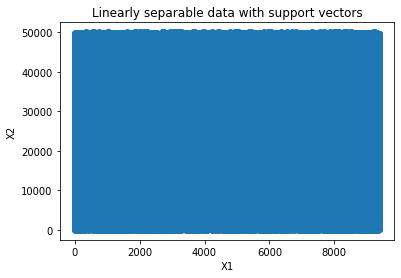

In [96]:
#visualize svm
# Get support vector indices
support_vector_indices = clf_dec.support_
print(support_vector_indices)
# Get number of support vectors per class
support_vectors_per_class = clf_dec.n_support_
print(support_vectors_per_class)
# Get support vectors themselves
support_vectors = clf_dec.support_vectors_

# Visualize support vectors
Train_X_Tfidf_dec_mtlb = Train_X_Tfidf_dec.todok()
xy = np.array(list(Train_X_Tfidf_dec_mtlb.keys()))
vals = np.array(list(Train_X_Tfidf_dec_mtlb.values()))

plt.scatter(xy[:,0], xy[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [28]:
# fit the training dataset on the classifier
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [2,3,5,7,9]
classifiers = []
for kern in kernels:
    start_time = time.time()
    if kern == 'poly':
        for deg in degrees:
            start_time = time.time()
            clf_result = OneClassSVM(gamma='auto', kernel=kern, degree=deg).fit(Train_X_Tfidf_dec)
            elapsed_time = time.time() - start_time
            classifiers.append([kern,deg,clf_result,elapsed_time])
            print('kernel used: ' , kern, ' degree used: ' , deg, ' elapsed_time:' , elapsed_time)
            
    else:
        clf_result = OneClassSVM(gamma='auto', kernel=kern).fit(Train_X_Tfidf_dec)
        elapsed_time = time.time() - start_time
        classifiers.append([kern,0,clf_result,elapsed_time])
        print('kernel used: ' , kern, ' elapsed_time: ' , elapsed_time)

# predict the labels on validation dataset

kernel used:  linear  elapsed_time:  5.374202251434326
kernel used:  poly  degree used:  2  elapsed_time: 3.5477609634399414
kernel used:  poly  degree used:  3  elapsed_time: 3.593653917312622
kernel used:  poly  degree used:  5  elapsed_time: 3.6128950119018555
kernel used:  poly  degree used:  7  elapsed_time: 3.6856327056884766
kernel used:  poly  degree used:  9  elapsed_time: 3.597888708114624
kernel used:  rbf  elapsed_time:  4.539952516555786
kernel used:  sigmoid  elapsed_time:  4.217468023300171


In [29]:
clas_result = []
for clas in classifiers:
    start_time = time.time()
    predict_result = clas[2].predict(Test_X_Tfidf_dec)
    elapsed_time = time.time() - start_time
    clas_result.append([clas[0],clas[1],clas[2],predict_result])
    acc = accuracy_score(predict_result*-1, Test_X_oc_all['label'], normalize=True)
    print('kernel used: ' , clas[0], ' degree used:' , clas[1], ' elapsed_time: ' , elapsed_time, ' accuracy: ', acc)
            

# predict the labels on validation dataset

kernel used:  linear  degree used: 0  elapsed_time:  14.572816848754883  accuracy:  0.4548261293467663
kernel used:  poly  degree used: 2  elapsed_time:  15.981101274490356  accuracy:  0.8657783555411115
kernel used:  poly  degree used: 3  elapsed_time:  16.039520263671875  accuracy:  0.8659950167912469
kernel used:  poly  degree used: 5  elapsed_time:  16.085498094558716  accuracy:  0.8661575127288484
kernel used:  poly  degree used: 7  elapsed_time:  16.17628502845764  accuracy:  0.8662658433539161
kernel used:  poly  degree used: 9  elapsed_time:  17.860909938812256  accuracy:  0.8662658433539161
kernel used:  rbf  degree used: 0  elapsed_time:  16.067665576934814  accuracy:  0.4641425631025891
kernel used:  sigmoid  degree used: 0  elapsed_time:  16.021503686904907  accuracy:  0.47324233560827644
